# PROBLEM 9: Calibration and Prediction

### Part b
A source of contamination has been discovered in the northeastern comer of the

aquifer. At the same time an industry is trying to gain permission to pump

groundwater from a well located at row 13, column 4 of the modeled area. What

is the maximum pumping rate that should be allowed to prevent the industry from

contaminating its own water supply?

### Table 9.1: River Data

| Row | Column | Stage (ft) | Bottom Elevation (ft) |
|-----|--------|------------|-----------------------|
| 4   | 1      | 100        | 90                    |
| 4   | 2      | 100        | 90                    |
| 4   | 3      | 100        | 90                    |
| 4   | 4      | 99         | 89                    |
| 4   | 5      | 99         | 89                    |
| 5   | 6      | 98         | 88                    |
| 6   | 7      | 97         | 86                    |
| 7   | 8      | 96         | 86                    |
| 8   | 9      | 95         | 85                    |
| 9   | 10     | 94         | 84                    |
| 9   | 11     | 94         | 84                    |
| 9   | 12     | 94         | 84                    |
| 9   | 13     | 94         | 84                    |
| 9   | 14     | 93         | 83                    |
| 9   | 15     | 93         | 83                    |

### Table 9.2: Calibration Targets

| Row | Column | Head (ft) |
|-----|--------|-----------|
| 14  | 1      | 124       |
| 11  | 4      | 119.9     |
| 13  | 13     | 113.9     |
| 8   | 1      | 116.1     |
| 4   | 12     | 113       |
| 9   | 6      | 114       |
| 2   | 3      | 108.5     |
| 11  | 10     | 111.7     |
| 7   | 14     | 107.6     |
| 3   | 8      | 111.3     |
| 2   | 15     | 115.6     |

In [1]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
#import csv

In [2]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/problem9_grid_data.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\EPA-MF-Problems\Notebooks
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]


[ 500.  500.  500.  500.  500.  500.  500.  500.  500.  500.  500.  500.
  500.  500.  500.]
7500.0


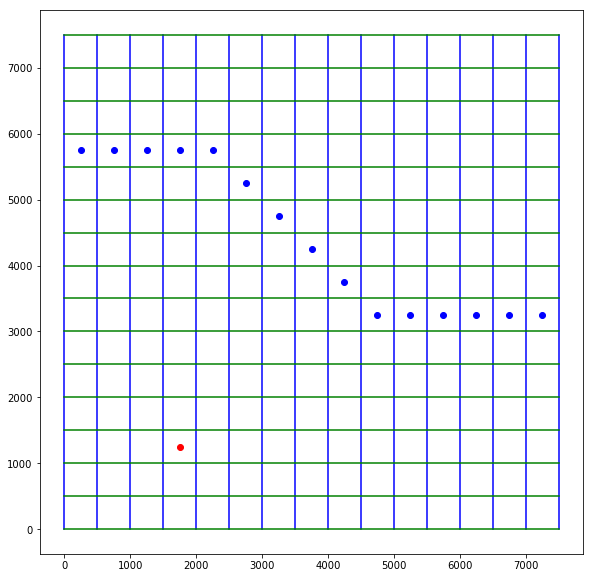

In [3]:
#code to create the grid image
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0 #sets ymin equal to zero
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0 #sets xmin equal to zero
x = 0 #sets x equal to zero
y = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')

    #assign the x and y values to the sum of the list and then divided 
    #in half in order the get the mean, now the well is right in the middle
xmean = delr_array.sum() * .5
ymean = delr_array.sum() * .5

#create well
x0 = 1750
y0 = 1250
def wel_sp(x0, y0, sym):
    plt.plot(x0, y0, sym)
wel_sp(x0, y0, sym='ro')

#create river
x1 = 250
y1 = 5750
def riv1(x1, y1, sym):
    plt.plot(x1, y1, sym)
riv1(x1, y1, sym='bo')

x2 = 750
y2 = 5750
def riv2(x2, y2, sym):
    plt.plot(x2, y2, sym)
riv2(x2, y2, sym='bo')

x3 = 1250
y3 = 5750
def riv3(x3, y3, sym):
    plt.plot(x3, y3, sym)
riv3(x3, y3, sym='bo')

x4 = 1750
y4 = 5750
def riv4(x4, y4, sym):
    plt.plot(x4, y4, sym)
riv4(x4, y4, sym='bo')

x5 = 2250
y5 = 5750
def riv5(x5, y5, sym):
    plt.plot(x5, y5, sym)
riv5(x5, y5, sym='bo')

x6 = 2750
y6 = 5250
def riv6(x6, y6, sym):
    plt.plot(x6, y6, sym)
riv6(x6, y6, sym='bo')

x7 = 3250
y7 = 4750
def riv7(x7, y7, sym):
    plt.plot(x7, y7, sym)
riv7(x7, y7, sym='bo')

x8 = 3750
y8 = 4250
def riv8(x8, y8, sym):
    plt.plot(x8, y8, sym)
riv8(x8, y8, sym='bo')

x9 = 4250
y9 = 3750
def riv9(x9, y9, sym):
    plt.plot(x9, y9, sym)
riv9(x9, y9, sym='bo')

x10 = 4750
y10 = 3250
def riv10(x10, y10, sym):
    plt.plot(x10, y10, sym)
riv10(x10, y10, sym='bo')

x11 = 5250
y11 = 3250
def riv11(x11, y11, sym):
    plt.plot(x11, y11, sym)
riv11(x11, y11, sym='bo')

x12 = 5750
y12 = 3250
def riv12(x12, y12, sym):
    plt.plot(x12, y12, sym)
riv12(x12, y12, sym='bo')

x13 = 6250
y13 = 3250
def riv13(x13, y13, sym):
    plt.plot(x13, y13, sym)
riv13(x13, y13, sym='bo')

x14 = 6750
y14 = 3250
def riv14(x14, y14, sym):
    plt.plot(x14, y14, sym)
riv14(x14, y14, sym='bo')

x15 = 7250
y15 = 3250
def riv15(x15, y15, sym):
    plt.plot(x15, y15, sym)
riv15(x15, y15, sym='bo')

In [32]:
#Flopy objects
modelname = 'p9_pb' #short for problem 9 part b
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [33]:
#dis package
#call in the discretization package
nlay = 1
nrow = 15
ncol = 15
delr = 500
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 86400. #length of stress period
tsmult = 11 #time step multiplier
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, tsmult=tsmult, steady=False)

In [34]:
#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [35]:
#wel package
pr = 4000 #pumping rate
wel_sp = [[0, 12, 3, -pr]]
stress_period_data = {0: wel_sp}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

In [36]:
#pcg package
pcg = flopy.modflow.ModflowPcg(mf)

In [37]:
#lpf package
laytyp = np.zeros((nlay))
lpf = flopy.modflow.ModflowLpf(mf, laytyp=laytyp)

In [38]:
#oc package
oc = flopy.modflow.ModflowOc(mf)

In [39]:
#riv package
ipakcb = 0
stage1 = 100.0
stage2 = 99.0
stage3 = 98.0
stage4 = 97.0
stage5 = 96.0
stage6 = 95.0
stage7 = 94.0
stage8 = 93.0 
cond =  0.01
rbot1 = 90.0
rbot2 = 89.0
rbot3 = 88.0
rbot4 = 86.0
rbot5 = 85.0
rbot6 = 84.0
rbot7 = 83.0

riv_sp = [[0, 3, 0, stage1, cond, rbot1],
          [0, 3, 1, stage1, cond, rbot1],
          [0, 3, 2, stage1, cond, rbot1],
          [0, 3, 3, stage2, cond, rbot2],
          [0, 3, 4, stage2, cond, rbot2],
          [0, 4, 5, stage3, cond, rbot3],
          [0, 5, 6, stage4, cond, rbot4],
          [0, 6, 7, stage5, cond, rbot4],
          [0, 7, 8, stage6, cond, rbot5],
          [0, 8, 9, stage7, cond, rbot6],
          [0, 8, 10, stage7, cond, rbot6],
          [0, 8, 11, stage7, cond, rbot6],
          [0, 8, 12, stage7, cond, rbot6],
          [0, 8, 13, stage8, cond, rbot7],
          [0, 8, 14, stage8, cond, rbot7]]
          
riv_spd = {0: riv_sp}
riv = flopy.modflow.ModflowRiv(mf, ipakcb=ipakcb, stress_period_data=riv_spd)

print(riv_sp)

[[0, 3, 0, 100.0, 0.01, 90.0], [0, 3, 1, 100.0, 0.01, 90.0], [0, 3, 2, 100.0, 0.01, 90.0], [0, 3, 3, 99.0, 0.01, 89.0], [0, 3, 4, 99.0, 0.01, 89.0], [0, 4, 5, 98.0, 0.01, 88.0], [0, 5, 6, 97.0, 0.01, 86.0], [0, 6, 7, 96.0, 0.01, 86.0], [0, 7, 8, 95.0, 0.01, 85.0], [0, 8, 9, 94.0, 0.01, 84.0], [0, 8, 10, 94.0, 0.01, 84.0], [0, 8, 11, 94.0, 0.01, 84.0], [0, 8, 12, 94.0, 0.01, 84.0], [0, 8, 13, 93.0, 0.01, 83.0], [0, 8, 14, 93.0, 0.01, 83.0]]


In [40]:
#rch package
rech = 200
rch = flopy.modflow.ModflowRch(mf, rech=rech)

In [41]:
# Write the MODFLOW model input files
mf.write_input()

In [42]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p9_pb.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/06/29 10:21:27

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2017/06/29 10:21:27
 Elapsed run time:  0.015 Seconds

 FAILED TO MEET SOLVER CONVERGENCE CRITERIA            1  TIME(S)
